# FID under 1/f Noise

### Imports

In [1]:
include("c:/Users/vikra/OneDrive/Desktop/project/src/QuantumDD/QuantumDD.jl")
cd("c:/Users/vikra/OneDrive/Desktop/project")
using Pkg
Pkg.activate(".")
using .QuantumDD, Plots, LsqFit

  Activating project at `c:\Users\vikra\OneDrive\Desktop\project`


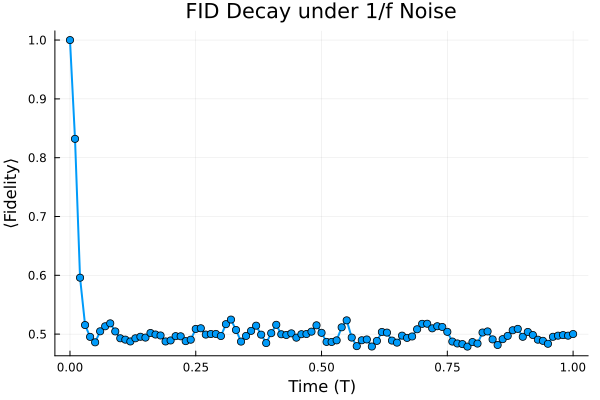

In [11]:
parameters = get_preset_params("1/f")
S_func = ω-> S(ω; parameters...)

# Run FID simulation
T_max = 1.0         # Total maximum evolution time
dt = 1e-2             # Time step (resolution of T values)
n_realizations = 1000 # Number of noise samples

T_vals, avg_fids = fast_average_fidelity_vs_time(S_func;
                                                 T_max=T_max,
                                                 dt=dt,
                                                 n_realizations=n_realizations,
                                                 target_std=1.0,
                                                 seed_offset=rand(Int),
                                                 use_gpu=true,
                                                 verbose=true)

# Plot the results
plot(T_vals, avg_fids,
     xlabel="Time (T)",
     ylabel="⟨Fidelity⟩",
     title="FID Decay under 1/f Noise",
     lw=2, marker=:circle,
     legend=false)


In [12]:
# Define the fit model: F(t) = 0.5 + 0.5 * exp(-Γ * t^2)
fit_model(t, p) = 0.5 .+ 0.5 .* exp.(-p[1] .* t.^2)

# Perform fit
fit = curve_fit(fit_model, T_vals, avg_fids, [0.001])  # initial guess for Γ

Γ_fit = fit.param[1]
println("Fitted Gamma (Γ): ", Γ_fit)

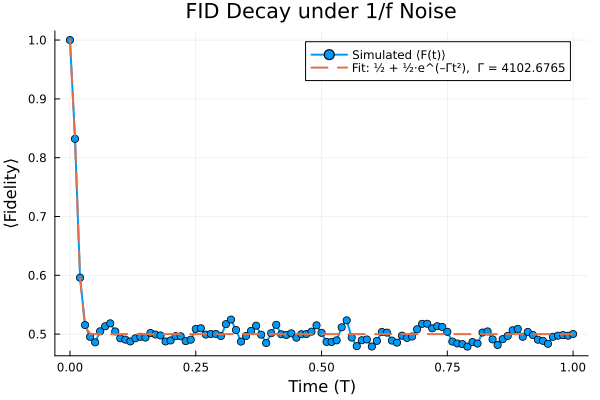

In [13]:
plot(T_vals, avg_fids,
     label="Simulated ⟨F(t)⟩", lw=2, marker=:circle,
     xlabel="Time (T)", ylabel="⟨Fidelity⟩",
     title="FID Decay under 1/f Noise")

plot!(T_vals, fit_model(T_vals, fit.param),
      label="Fit: ½ + ½·e^(–Γt²),  Γ = $(round(Γ_fit, digits=4))", lw=2, linestyle=:dash)


Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 10 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 20 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 30 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 40 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 50 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 60 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 70 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49


Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 80 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 90 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 100 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 110 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 120 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 130 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 140 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 150 on thread 1
└ @ Main.QuantumDD 

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 190 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 200 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 210 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 220 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 230 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 240 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 250 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 260 on thread 1
└ @ Main.QuantumD

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 330 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 340 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 350 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 360 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 370 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 380 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49


Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 390 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 400 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 410 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 420 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 430 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 440 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 450 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 460 on thread 1
└ @ Main.QuantumD

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 550 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 560 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 570 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 580 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 590 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 600 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49


Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 610 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 620 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 630 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 640 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 650 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 660 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 670 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 680 on thread 1
└ @ Main.QuantumD

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 770 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 780 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 790 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 800 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 810 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 820 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 830 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 840 on thread 1
└ @ Main.QuantumD

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
Progress: [===================

┌ Info: Finished realization 900 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 910 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 920 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 930 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 940 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 950 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 960 on thread 1
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:49
┌ Info: Finished realization 970 on thread 1
└ @ Main.QuantumD

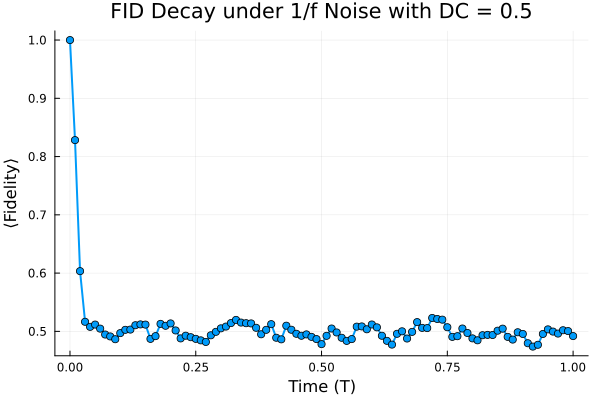

In [2]:
parameters = get_preset_params("1/f")
S_func = ω-> S(ω; parameters...)

# Run FID simulation
T_max = 1.0         # Total maximum evolution time
dt = 1e-2             # Time step (resolution of T values)
n_realizations = 1000 # Number of noise samples
dc = 0.5             # DC offset
T_vals, avg_fids = fast_average_fidelity_vs_time(S_func;
                                                 T_max=T_max,
                                                 dt=dt,
                                                 n_realizations=n_realizations,
                                                 target_std=1.0,
                                                 dc=dc,
                                                 seed_offset=rand(Int),
                                                 use_gpu=true,
                                                 verbose=true)

# Plot the results
plot(T_vals, avg_fids,
     xlabel="Time (T)",
     ylabel="⟨Fidelity⟩",
     title="FID Decay under 1/f Noise with DC = $dc",
     lw=2, marker=:circle,
     legend=false)


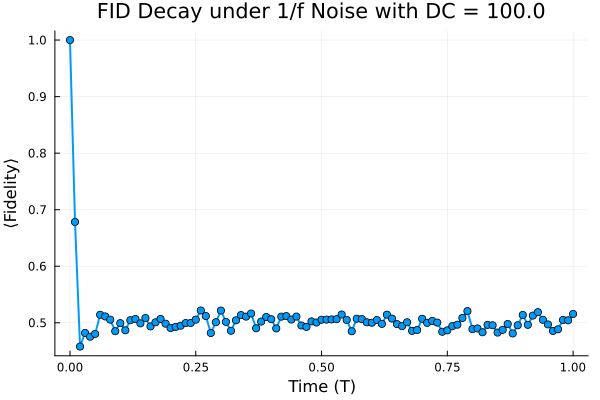

In [15]:
parameters = get_preset_params("1/f")
S_func = ω-> S(ω; parameters...)

# Run FID simulation
T_max = 1.0         # Total maximum evolution time
dt = 1e-2             # Time step (resolution of T values)
n_realizations = 1000 # Number of noise samples
dc = 1/dt             # DC offset
T_vals, avg_fids = fast_average_fidelity_vs_time(S_func;
                                                 T_max=T_max,
                                                 dt=dt,
                                                 n_realizations=n_realizations,
                                                 target_std=1.0,
                                                 dc=dc,
                                                 seed_offset=rand(Int),
                                                 use_gpu=true,
                                                 verbose=true)

# Plot the results
plot(T_vals, avg_fids,
     xlabel="Time (T)",
     ylabel="⟨Fidelity⟩",
     title="FID Decay under 1/f Noise with DC = $dc",
     lw=2, marker=:circle,
     legend=false)


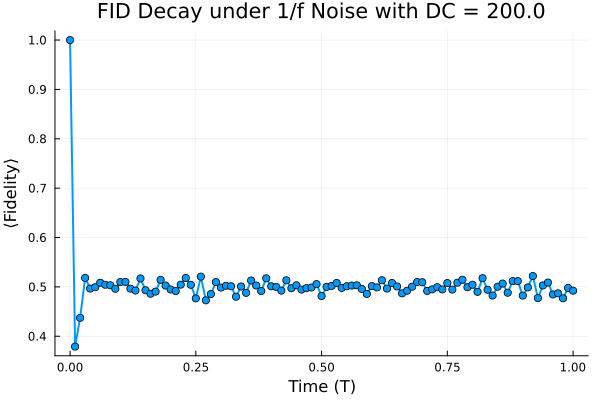

In [17]:
parameters = get_preset_params("1/f")
S_func = ω-> S(ω; parameters...)

# Run FID simulation
T_max = 1.0         # Total maximum evolution time
dt = 1e-2             # Time step (resolution of T values)
n_realizations = 1000 # Number of noise samples
dc = 2/dt             # DC offset
T_vals, avg_fids = fast_average_fidelity_vs_time(S_func;
                                                 T_max=T_max,
                                                 dt=dt,
                                                 n_realizations=n_realizations,
                                                 target_std=1.0,
                                                 dc=dc,
                                                 seed_offset=rand(Int),
                                                 use_gpu=true,
                                                 verbose=true)

# Plot the results
plot(T_vals, avg_fids,
     xlabel="Time (T)",
     ylabel="⟨Fidelity⟩",
     title="FID Decay under 1/f Noise with DC = $dc",
     lw=2, marker=:circle,
     legend=false)


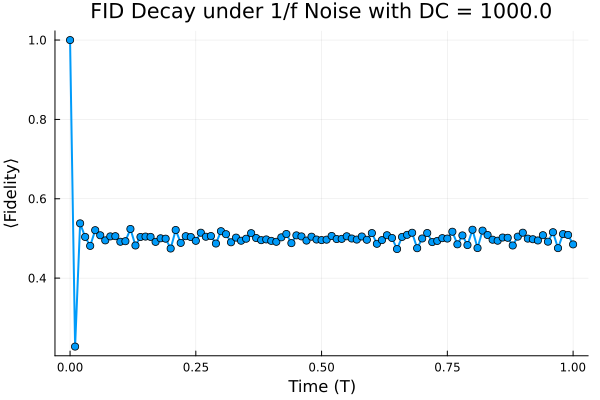

In [18]:
parameters = get_preset_params("1/f")
S_func = ω-> S(ω; parameters...)

# Run FID simulation
T_max = 1.0         # Total maximum evolution time
dt = 1e-2             # Time step (resolution of T values)
n_realizations = 1000 # Number of noise samples
dc = 10/dt             # DC offset
T_vals, avg_fids = fast_average_fidelity_vs_time(S_func;
                                                 T_max=T_max,
                                                 dt=dt,
                                                 n_realizations=n_realizations,
                                                 target_std=1.0,
                                                 dc=dc,
                                                 seed_offset=rand(Int),
                                                 use_gpu=true,
                                                 verbose=true)

# Plot the results
plot(T_vals, avg_fids,
     xlabel="Time (T)",
     ylabel="⟨Fidelity⟩",
     title="FID Decay under 1/f Noise with DC = $dc",
     lw=2, marker=:circle,
     legend=false)
